# Yelp Users Dataset Dimensionality Reduction 

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis

%matplotlib inline

In [2]:
users=pd.read_csv('yelp_user.csv')
users.head()

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
1,uUzsFQn_6cXDh6rPNGbIFA,Tiffy,1,2017-03-02,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
2,mBneaEEH5EMyxaVyqS-72A,Mark,6,2015-03-13,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
3,W5mJGs-dcDWRGEhAzUYtoA,Evelyn,3,2016-09-08,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
4,4E8--zUZO1Rr1IBK4_83fg,Lisa,11,2012-07-16,None,4,0,0,0,None,...,0,0,0,0,0,0,0,0,1,0


Feature explanation:
* review_count: the number of reviews they've written
* friends: an array of the user's friend as user_ids
* useful: number of useful votes sent by the user
* funny: number of funny votes sent by the user
* cool: number of cool votes sent by the user
* fans: number of fans the user has
* elite: the years the user was elite
* average_stars: average rating of all reviews
* compliment_hot: number of hot compliments received by the user
* compliment_more: number of more compliments received by the user <br>
...

In [3]:
column_names=users.columns.tolist()
print("Column names:")
print(column_names)

Column names:
['user_id', 'name', 'review_count', 'yelping_since', 'friends', 'useful', 'funny', 'cool', 'fans', 'elite', 'average_stars', 'compliment_hot', 'compliment_more', 'compliment_profile', 'compliment_cute', 'compliment_list', 'compliment_note', 'compliment_plain', 'compliment_cool', 'compliment_funny', 'compliment_writer', 'compliment_photos']


In [4]:
users.corr()

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
review_count,1.000000,0.291062,0.229759,0.254121,0.570175,0.013034,0.292225,0.194017,0.141717,0.145799,0.098460,0.217080,0.340212,0.338642,0.338642,0.339675,0.123462
useful,0.291062,1.000000,0.845041,0.924657,0.453555,0.003683,0.551440,0.393819,0.385850,0.306258,0.237762,0.393481,0.692946,0.659646,0.659646,0.601505,0.400108
funny,0.229759,0.845041,1.000000,0.850814,0.364839,0.002853,0.581662,0.430156,0.428305,0.317685,0.257382,0.404103,0.678976,0.686803,0.686803,0.649373,0.474750
cool,0.254121,0.924657,0.850814,1.000000,0.417416,0.004151,0.561581,0.396756,0.392955,0.306272,0.240986,0.385263,0.682709,0.669897,0.669897,0.609137,0.416365
fans,0.570175,0.453555,0.364839,0.417416,1.000000,0.010620,0.496956,0.268812,0.217340,0.253447,0.137268,0.333773,0.567380,0.539055,0.539055,0.503030,0.238160
average_stars,0.013034,0.003683,0.002853,0.004151,0.010620,1.000000,0.004172,0.002218,0.001736,0.001988,0.001054,0.002001,0.004567,0.004770,0.004770,0.004062,0.002018
compliment_hot,0.292225,0.551440,0.581662,0.561581,0.496956,0.004172,1.000000,0.658343,0.649696,0.630394,0.481100,0.685037,0.760840,0.918542,0.918542,0.845197,0.680324
compliment_more,0.194017,0.393819,0.430156,0.396756,0.268812,0.002218,0.658343,1.000000,0.963956,0.928060,0.944532,0.466313,0.623228,0.704423,0.704423,0.804018,0.876037
compliment_profile,0.141717,0.385850,0.428305,0.392955,0.217340,0.001736,0.649696,0.963956,1.000000,0.892108,0.911768,0.437517,0.612165,0.690690,0.690690,0.791655,0.849535
compliment_cute,0.145799,0.306258,0.317685,0.306272,0.253447,0.001988,0.630394,0.928060,0.892108,1.000000,0.944928,0.398011,0.532601,0.623037,0.623037,0.682582,0.841235


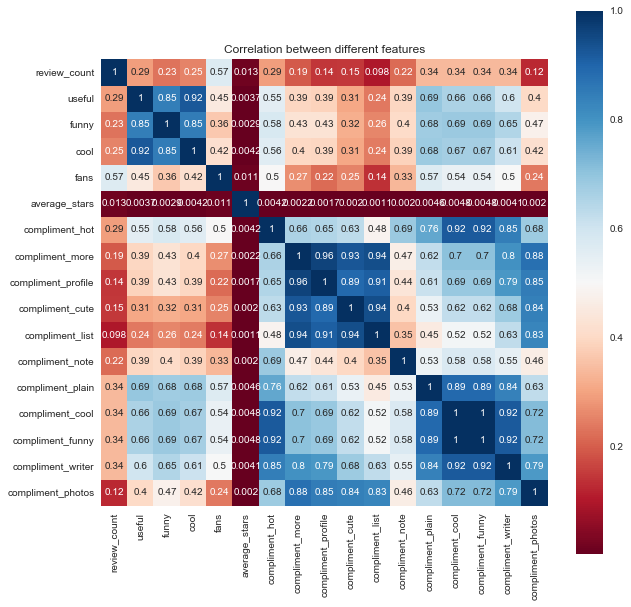

In [5]:
correlation=users.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='RdBu')
plt.title('Correlation between different features')

In [6]:
users_drop=users.drop(labels=['user_id','name','yelping_since','friends','elite'],axis=1)
users_drop.head()

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,10,0,0,0,0,3.70,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,2.00,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,4.67,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,4.67,0,0,0,0,0,0,0,0,0,0,0
4,11,4,0,0,0,3.45,0,0,0,0,0,0,0,0,0,1,0


In [23]:
X=users_drop.values
variable_names=users_drop.columns.values
X

array([[ 10.,   0.,   0., ...,   0.,   0.,   0.],
       [  1.,   0.,   0., ...,   0.,   0.,   0.],
       [  6.,   0.,   0., ...,   0.,   0.,   0.],
       ..., 
       [ 12.,   0.,   0., ...,   0.,   0.,   0.],
       [ 33.,   5.,   0., ...,   0.,   0.,   0.],
       [  5.,   1.,   0., ...,   0.,   0.,   0.]])

In [9]:
np.shape(X)

(1326100, 17)

## Principle Component Analysis Method

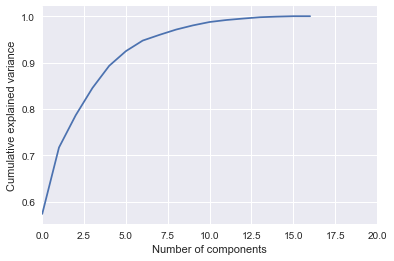

In [15]:
#standardize data before implement PCA
X_std=StandardScaler().fit_transform(X)

#apply pca model to the standardized data
pca=PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,20,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

The plot shows that more than 90% variance is covered by first 5 components.

In [17]:
sklearn_pca=PCA(n_components=5)
Y_sklearn=sklearn_pca.fit_transform(X_std)
Y_sklearn.shape

(1326100, 5)

The dimension of the dateset has been reduced to 5 instead of 17.

## Factor Analysis Method

In [24]:
factor=FactorAnalysis().fit(X)
pd.DataFrame(factor.components_,columns=variable_names)

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,22.224116,688.977125,4.540815e+02,652.176237,6.380756,0.004392,45.906367,6.443204,7.554730,4.705210,3.197828,25.261719,68.129368,63.694567,63.694567,22.340709,45.043139
1,2.422332,95.469489,-1.961075e+02,50.336851,0.558451,0.001079,-19.136499,-3.589077,-4.348496,-2.593131,-2.151138,-9.593912,-15.430538,-22.588328,-22.588328,-9.722551,-30.948468
2,-8.054673,-120.116610,-2.233420e+01,142.664776,-1.216145,0.001405,0.765520,-0.106074,0.056649,-0.073216,0.026384,-2.037792,-3.382447,0.820302,0.820302,-0.122972,1.873400
3,19.647619,1.423653,-4.807751e+01,-5.968024,4.995201,0.004073,50.819174,9.063219,10.349925,8.694231,6.640281,26.668178,49.445846,57.077811,57.077811,21.006908,59.684457
4,-66.765770,4.466525,-2.822786e+00,-1.052517,-6.125593,-0.012346,-0.851712,3.625526,4.862442,3.937158,4.022949,-0.700110,-6.203076,-3.304834,-3.304834,0.564056,36.211391
5,29.046974,0.312248,7.520873e-03,1.293796,-0.259990,0.005649,-10.077653,5.477664,5.670628,5.339618,5.793681,-4.088135,-10.729833,-10.274271,-10.274271,2.604254,45.032374
6,1.058020,0.088620,2.453784e-01,0.515915,-0.326002,-0.000860,15.624455,-0.078323,-0.444405,-0.010396,-0.140263,44.503748,-14.198595,-5.147053,-5.147053,-1.856174,-1.051357
7,-1.257782,-1.027243,1.244192e-01,0.237589,1.036300,-0.000980,-14.105271,0.388725,0.315858,-0.468238,0.701023,12.815193,32.665213,-5.657842,-5.657842,-0.356124,1.342946
8,0.254216,-0.072287,1.700527e-01,0.061967,1.681487,0.001195,15.914101,-0.733774,-0.420525,1.294833,-0.557314,-5.648075,6.102526,-4.246431,-4.246431,-1.333713,0.609257
9,-0.260664,-0.031135,7.150026e-02,0.026996,-0.501677,-0.001998,0.391064,5.855811,7.720179,4.723770,4.899421,-0.146392,-0.126234,-0.566547,-0.566547,6.510593,-3.559628
